**ASSIGNMENT - 1** 

**CONVOLUTION**

In [ ]:
GROUP-13 (PHANI VARSHITHA, DURGA CHOWDARY)

In [ ]:
Training from scratch model

In [1]:
# Creating directories and assiging images to training, validation and test directories
import os, shutil, pathlib

directory = pathlib.Path("C:/Users/varshitha/Downloads/dogs-vs-cats/train/train")
small_directory = pathlib.Path("C:/Users/varshitha/Downloads/dogs-vs-cats/train/small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = small_directory / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=directory / fname,
                            dst= dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\varshitha\\Downloads\\dogs-vs-cats\\train\\small\\train\\cat'

In [2]:
#Building the model and running the model summary
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Configuration of the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [4]:
# Declaring the image size and batch size to read the images from train. validation and test directories
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    small_directory / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    small_directory / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    small_directory / "test",
    image_size=(180, 180),
    batch_size=32)



Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [5]:
# Using the callbacks function to monitor validation loss and running the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5002 - loss: 0.7058 - val_accuracy: 0.5990 - val_loss: 0.6926
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 916ms/step - accuracy: 0.5165 - loss: 0.6933 - val_accuracy: 0.5130 - val_loss: 0.6886
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 909ms/step - accuracy: 0.5520 - loss: 0.6898 - val_accuracy: 0.5490 - val_loss: 0.6627
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 886ms/step - accuracy: 0.5926 - loss: 0.6731 - val_accuracy: 0.6610 - val_loss: 0.6203
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 894ms/step - accuracy: 0.6448 - loss: 0.6277 - val_accuracy: 0.6930 - val_loss: 0.6049
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 923ms/step - accuracy: 0.6929 - loss: 0.5952 - val_accuracy: 0.7040 - val_loss: 0.5664
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 898ms/step - accuracy: 0.6924 - loss: 0.5744 - val_accuracy: 0.6850 - val_loss: 0.5952
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 871ms/step - accuracy: 0.7239 - loss: 0.5527 - val_accurac

In [6]:
# Testing the model
model.evaluate(test_dataset)

63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 272ms/step - accuracy: 0.7235 - loss: 2.1129


[2.0441811084747314, 0.7360000014305115]

In [7]:
# Declaring Data Augumentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


In [8]:
# Building the model and configuing it
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [9]:
# Using the callbacks function to monitor validation loss and running the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=60,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 942ms/step - accuracy: 0.4804 - loss: 0.7004 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 897ms/step - accuracy: 0.4926 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 3/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5115 - loss: 0.6943 - val_accuracy: 0.5400 - val_loss: 0.6903
Epoch 4/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 955ms/step - accuracy: 0.5329 - loss: 0.6927 - val_accuracy: 0.6380 - val_loss: 0.6724
Epoch 5/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 59s 938ms/step - accuracy: 0.6021 - loss: 0.7005 - val_accuracy: 0.5480 - val_loss: 0.6696
Epoch 6/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 921ms/step - accuracy: 0.6351 - loss: 0.6420 - val_accuracy: 0.6340 - val_loss: 0.6398
Epoch 7/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 909ms/step - accuracy: 0.6340 - loss: 0.6425 - val_accuracy: 0.5760 - val_loss: 0.6966
Epoch 8/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.6476 - loss: 0.6195 - val_accuracy:

KeyboardInterrupt: 

In [11]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")  

63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 717ms/step - accuracy: 0.8393 - loss: 0.3790
Test accuracy: 0.827


**Question 2**

In [12]:
# Training has 2000 samples, test has 1000 samples, and validation has 500 samples
make_subset("train2", start_index=0, end_index=2000)
make_subset("validation2", start_index=2000, end_index=2500)
make_subset("test2", start_index=2500, end_index=3000)

In [13]:

train_dataset = image_dataset_from_directory(
    small_directory / "train2",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    small_directory / "validation2",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    small_directory / "test2",
    image_size=(180, 180),
    batch_size=32)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [14]:
# Configuring the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [15]:
# Using the callbacks function to monitor validation loss and running the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.8485 - loss: 0.3906 - val_accuracy: 0.6920 - val_loss: 0.9860
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 107s 855ms/step - accuracy: 0.8672 - loss: 0.3447 - val_accuracy: 0.8570 - val_loss: 0.3621
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 108s 867ms/step - accuracy: 0.8608 - loss: 0.3257 - val_accuracy: 0.8520 - val_loss: 0.3622
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 104s 830ms/step - accuracy: 0.8634 - loss: 0.3053 - val_accuracy: 0.8620 - val_loss: 0.3278
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 104s 833ms/step - accuracy: 0.8819 - loss: 0.2899 - val_accuracy: 0.8620 - val_loss: 0.4097
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 104s 830ms/step - accuracy: 0.8732 - loss: 0.3138 - val_accuracy: 0.8710 - val_loss: 0.3442
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 105s 838ms/step - accuracy: 0.8708 - loss: 0.2861 - val_accuracy: 0.8590 - val_loss: 0.3934
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 105s 841ms/step - accuracy: 0.8796 - lo

In [16]:
# Testing the model
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
   

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - accuracy: 0.8667 - loss: 0.3663
Test accuracy: 0.866


**Question 3**

In [17]:
from tensorflow.keras.utils import image_dataset_from_directory
# Set up the training subset
make_subset("train3", start_index=0, end_index=2500)
make_subset("validation3", start_index=2500, end_index=3000)
make_subset("test3", start_index=3000, end_index=3500)


train_dataset = image_dataset_from_directory(
    small_directory / "train3",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    small_directory / "validation3",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    small_directory / "test3",
    image_size=(180, 180),
    batch_size=32)


history = model.fit(
      train_dataset,
      epochs=30,
      validation_data=validation_dataset,
      callbacks=callbacks)



Found 5000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 132s 838ms/step - accuracy: 0.8934 - loss: 0.2738 - val_accuracy: 0.6230 - val_loss: 2.9534
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 128s 814ms/step - accuracy: 0.8931 - loss: 0.3533 - val_accuracy: 0.8530 - val_loss: 0.4656
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 129s 822ms/step - accuracy: 0.9015 - loss: 0.2459 - val_accuracy: 0.8520 - val_loss: 0.4885
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 128s 816ms/step - accuracy: 0.9034 - loss: 0.2462 - val_accuracy: 0.8750 - val_loss: 0.3949
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9003 - loss: 0.2509 - val_accuracy: 0.8380 - val_loss: 0.5518
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.9035 - loss: 0.2469 - val_accuracy: 0.8820 - val_loss: 0.3874
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.8992 - loss: 0.2571 - va

NameError: name 'history_dict' is not defined

In [23]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 689ms/step - accuracy: 0.9170 - loss: 0.2241
Test accuracy: 0.909


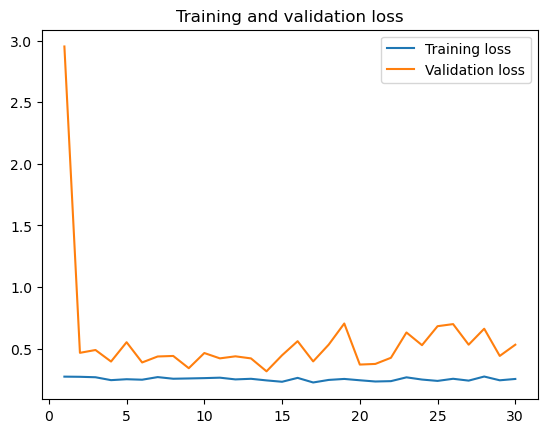

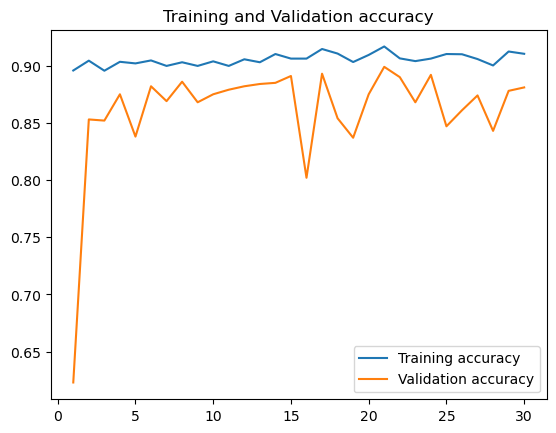

In [24]:
# Storing accuracies and losses in variables
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(accuracy)+1)
# Plotting losses
plt.plot(epochs,loss,label="Training loss")
plt.plot(epochs,val_loss,label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.figure()
# Plotting accuracies
plt.plot(epochs,accuracy,label="Training accuracy")
plt.plot(epochs, val_accuracy,label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()

**Question 4**

Step - 1 data 

In [25]:
# Training has 1500 samples, test has 1000 samples, and validation has 500 samples


train_dataset = image_dataset_from_directory(
    small_directory / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    small_directory / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    small_directory / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [26]:
# Loading pre-trained weights to VGG16 model
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Defining function to extract features and labels
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)
# Extracting the features and labels from datasets
train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)
train_features.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━

(2000, 5, 5, 512)

In [34]:
# Building the model
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Running the callback function to monitor validation loss
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]

# Training the model
history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8611 - loss: 26.4721 - val_accuracy: 0.9730 - val_loss: 3.3998
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9725 - loss: 3.7335 - val_accuracy: 0.9500 - val_loss: 9.8640
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9793 - loss: 2.3200 - val_accuracy: 0.9730 - val_loss: 5.0514
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9899 - loss: 1.1943 - val_accuracy: 0.9790 - val_loss: 3.5139
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9945 - loss: 0.7297 - val_accuracy: 0.9790 - val_loss: 4.0251
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9970 - loss: 0.2611 - val_accuracy: 0.9760 - val_loss: 3.8740
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9927 - loss: 0.9179 - val_accuracy: 0.9790 - val_loss: 3.9487
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9999 - loss: 0.0097 - val_accuracy: 0.9740 - 

In [35]:
# Testing the model
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9691 - loss: 4.1440
Test accuracy: 0.965


In [62]:
# Loading pre-trained weights to the VGG16 model
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

# UnFreezing the layers of the pretrained CNN
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False


In [63]:
# Declaring Data Augumentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
# Building the model and configuring it
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [64]:
# Using the callbacks function to monitor validation loss and running the model
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1465s 23s/step - accuracy: 0.4998 - loss: 846.0219 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1237s 19s/step - accuracy: 0.5015 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 435s 7s/step - accuracy: 0.4603 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 432s 7s/step - accuracy: 0.5067 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 433s 7s/step - accuracy: 0.4910 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 434s 7s/step - accuracy: 0.5060 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 435s 7s/step - accuracy: 0.4950 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 435s 7s/step - accuracy: 0.4871 - loss: 0.6941 - val_accuracy: 0.50

In [78]:
# Testing the model
test_model = model.evaluate(test_dataset)

32/32 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.4837 - loss: 0.6939


In [73]:
# Training the model on last sample as well:

train_dataset = image_dataset_from_directory(
    small_directory / "train3",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    small_directory / "validation3",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    small_directory / "test3",
    image_size=(180, 180),
    batch_size=32)

    # Training the model
history = model.fit(
      train_dataset,
      epochs=5,
      validation_data=validation_dataset)


Found 5000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1053s 7s/step - accuracy: 0.5134 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 919s 6s/step - accuracy: 0.4990 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 917s 6s/step - accuracy: 0.4973 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 916s 6s/step - accuracy: 0.4953 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 917s 6s/step - accuracy: 0.4989 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6934


In [75]:
 # Testing the model
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9691 - loss: 4.1440
Test accuracy: 0.965
